In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import string # special operations on strings
import spacy # language models
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/abhishekgd96/Text-Mining/main/reviews.csv', encoding = 'latin-1')
data

,0,Review Content
0,1,The camera is not up to the mark for its build...
1,2,"Selfie camera is not up to the mark,rest is go..."
2,3,Pros:- 1. Performance is best for normal user....
3,4,Writing this review after 19 days of usage\n\n...
4,5,I didn't felt a difference between 10k vs Nord...
...,...,...
1275,1276,If u are going to spend 28000 then blindly go ...
1276,1277,Every thing is perfect
1277,1278,The best phone in this segment and also the br...
1278,1279,Superb video photo gameing battery life very ...


In [3]:
data = data['Review Content']
data = data.astype(str)
data = data[data.str.contains('nan')==False]
data

0       The camera is not up to the mark for its build...
1       Selfie camera is not up to the mark,rest is go...
2       Pros:- 1. Performance is best for normal user....
3       Writing this review after 19 days of usage\n\n...
4       I didn't felt a difference between 10k vs Nord...
                              ...                        
1275    If u are going to spend 28000 then blindly go ...
1276                               Every thing is perfect
1277    The best phone in this segment and also the br...
1278     Superb video photo gameing battery life very ...
1279    My daughter liked it. She was looking for phon...
Name: Review Content, Length: 1189, dtype: object

In [4]:
data.describe()

count     1189
unique    1098
top       Good
freq        32
Name: Review Content, dtype: object

In [5]:
# remove both the leading and the trailing characters
data = [y.strip() for y in data]
data

['The camera is not up to the mark for its build. They say it has a Sony camera but the crispiness is not there once you capture it. Over all a great phone except for the camera. You can got it"',
 'Selfie camera is not up to the mark,rest is good, working softly after 1mths of use.Battery back up is of one day after normal use.Sound quality is very good,also the front camera,so good value for money.',
 "Pros:- 1. Performance is best for normal user.\n2. Camera is excellent as it has sony sensor.\n3. Fingerprint and display is also best as it has amoled display.\n4. Sound Quality is good\n\nCons:- the only cons i can see that if it has 5000mah battery, it would have been more better.\nHere i want to mention that don't go for negative review about battery, you have to optimise in the settings and it will easily give you 20-30 hrs of backup in single charge.",
 "Writing this review after 19 days of usage\n\nPro:\ndisplay is very nice and smooth\nPerformance is good\nLook and in hand feel

In [6]:
# removes empty strings, because they are considered in Python as False
data = [x for x in data if x]
data

['The camera is not up to the mark for its build. They say it has a Sony camera but the crispiness is not there once you capture it. Over all a great phone except for the camera. You can got it"',
 'Selfie camera is not up to the mark,rest is good, working softly after 1mths of use.Battery back up is of one day after normal use.Sound quality is very good,also the front camera,so good value for money.',
 "Pros:- 1. Performance is best for normal user.\n2. Camera is excellent as it has sony sensor.\n3. Fingerprint and display is also best as it has amoled display.\n4. Sound Quality is good\n\nCons:- the only cons i can see that if it has 5000mah battery, it would have been more better.\nHere i want to mention that don't go for negative review about battery, you have to optimise in the settings and it will easily give you 20-30 hrs of backup in single charge.",
 "Writing this review after 19 days of usage\n\nPro:\ndisplay is very nice and smooth\nPerformance is good\nLook and in hand feel

In [7]:
# Joining the list into one string/text
text = ' '.join(data)
text

'The camera is not up to the mark for its build. They say it has a Sony camera but the crispiness is not there once you capture it. Over all a great phone except for the camera. You can got it" Selfie camera is not up to the mark,rest is good, working softly after 1mths of use.Battery back up is of one day after normal use.Sound quality is very good,also the front camera,so good value for money. Pros:- 1. Performance is best for normal user.\n2. Camera is excellent as it has sony sensor.\n3. Fingerprint and display is also best as it has amoled display.\n4. Sound Quality is good\n\nCons:- the only cons i can see that if it has 5000mah battery, it would have been more better.\nHere i want to mention that don\'t go for negative review about battery, you have to optimise in the settings and it will easily give you 20-30 hrs of backup in single charge. Writing this review after 19 days of usage\n\nPro:\ndisplay is very nice and smooth\nPerformance is good\nLook and in hand feel is awesome\

In [8]:
#Punctuation

# with arguments (x, y, z)
# where 'x' and 'y' must be equal-length strings
# and characters in 'x' are replaced by characters in 'y'.
# 'z' is a string to be deleted (string.punctuation here)

no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'The camera is not up to the mark for its build They say it has a Sony camera but the crispiness is not there once you capture it Over all a great phone except for the camera You can got it Selfie camera is not up to the markrest is good working softly after 1mths of useBattery back up is of one day after normal useSound quality is very goodalso the front cameraso good value for money Pros 1 Performance is best for normal user\n2 Camera is excellent as it has sony sensor\n3 Fingerprint and display is also best as it has amoled display\n4 Sound Quality is good\n\nCons the only cons i can see that if it has 5000mah battery it would have been more better\nHere i want to mention that dont go for negative review about battery you have to optimise in the settings and it will easily give you 2030 hrs of backup in single charge Writing this review after 19 days of usage\n\nPro\ndisplay is very nice and smooth\nPerformance is good\nLook and in hand feel is awesome\nCharge time is 35mins max\n\n

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
#Tokenization
text_tokens = word_tokenize(no_punc_text)
text_tokens

['The',
 'camera',
 'is',
 'not',
 'up',
 'to',
 'the',
 'mark',
 'for',
 'its',
 'build',
 'They',
 'say',
 'it',
 'has',
 'a',
 'Sony',
 'camera',
 'but',
 'the',
 'crispiness',
 'is',
 'not',
 'there',
 'once',
 'you',
 'capture',
 'it',
 'Over',
 'all',
 'a',
 'great',
 'phone',
 'except',
 'for',
 'the',
 'camera',
 'You',
 'can',
 'got',
 'it',
 'Selfie',
 'camera',
 'is',
 'not',
 'up',
 'to',
 'the',
 'markrest',
 'is',
 'good',
 'working',
 'softly',
 'after',
 '1mths',
 'of',
 'useBattery',
 'back',
 'up',
 'is',
 'of',
 'one',
 'day',
 'after',
 'normal',
 'useSound',
 'quality',
 'is',
 'very',
 'goodalso',
 'the',
 'front',
 'cameraso',
 'good',
 'value',
 'for',
 'money',
 'Pros',
 '1',
 'Performance',
 'is',
 'best',
 'for',
 'normal',
 'user',
 '2',
 'Camera',
 'is',
 'excellent',
 'as',
 'it',
 'has',
 'sony',
 'sensor',
 '3',
 'Fingerprint',
 'and',
 'display',
 'is',
 'also',
 'best',
 'as',
 'it',
 'has',
 'amoled',
 'display',
 '4',
 'Sound',
 'Quality',
 'is',
 'g

In [11]:
len(text_tokens)

25547

In [12]:
#Remove stopwords
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
# Simplified look of the no_stop_tokes for loop
""" final_words = []
  for word in text_tokens:
   if word in my_stop_words:
     'do nothing'
   else:
     final_words.append(word)"""

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['The', 'camera', 'mark', 'build', 'They', 'say', 'Sony', 'camera', 'crispiness', 'capture', 'Over', 'great', 'phone', 'except', 'camera', 'You', 'got', 'Selfie', 'camera', 'markrest', 'good', 'working', 'softly', '1mths', 'useBattery', 'back', 'one', 'day', 'normal', 'useSound', 'quality', 'goodalso', 'front', 'cameraso', 'good', 'value', 'money', 'Pros', '1', 'Performance']


In [14]:
#normalise the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['the', 'camera', 'mark', 'build', 'they', 'say', 'sony', 'camera', 'crispiness', 'capture', 'over', 'great', 'phone', 'except', 'camera', 'you', 'got', 'selfie', 'camera', 'markrest', 'good', 'working', 'softly', '1mths', 'usebattery']


In [15]:
#Stemming
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['the', 'camera', 'mark', 'build', 'they', 'say', 'soni', 'camera', 'crispi', 'captur', 'over', 'great', 'phone', 'except', 'camera', 'you', 'got', 'selfi', 'camera', 'markrest', 'good', 'work', 'softli', '1mth', 'usebatteri', 'back', 'one', 'day', 'normal', 'usesound', 'qualiti', 'goodalso', 'front', 'cameraso', 'good', 'valu', 'money', 'pro', '1', 'perform']


In [16]:
!python -m spacy download en_core_web_md 

2022-11-21 14:42:34.918888: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 2.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [17]:
nlp = spacy.load('en_core_web_md')

In [18]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

The camera mark build They say Sony camera crispiness capture Over great phone except camera You got Selfie camera markrest good working softly 1mths useBattery back one day normal useSound quality goodalso front cameraso good value money Pros 1 Performance


In [19]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['the', 'camera', 'mark', 'build', 'they', 'say', 'Sony', 'camera', 'crispiness', 'capture', 'over', 'great', 'phone', 'except', 'camera', 'you', 'get', 'Selfie', 'camera', 'markrest', 'good', 'work', 'softly', '1mths', 'usebattery']


In [20]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [21]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

,0
zooming,2584
zoom,2583
zero,2582
yr,2581
youtube,2580
your,2579
youbattery,2578
you,2577
yhi,2576
yethoping,2575


In [22]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(20)

,0
0100,0
04,1
0to,2
10,3
100,4
1000,5
10000,6
100batterya,7
100charge,8
100times,9


In [23]:
print(vectorizer.vocabulary_)

{'the': 2313, 'camera': 508, 'mark': 1439, 'build': 487, 'they': 2318, 'say': 2041, 'sony': 2181, 'crispiness': 679, 'capture': 526, 'over': 1675, 'great': 1079, 'phone': 1739, 'except': 883, 'you': 2577, 'get': 1042, 'selfie': 2064, 'markrest': 1442, 'good': 1055, 'work': 2542, 'softly': 2165, '1mths': 58, 'usebattery': 2416, 'back': 356, 'one': 1625, 'day': 702, 'normal': 1587, 'usesound': 2424, 'quality': 1873, 'goodalso': 1057, 'front': 1009, 'cameraso': 515, 'value': 2440, 'money': 1514, 'pros': 1853, 'performance': 1723, 'well': 2506, 'user': 2421, 'excellent': 880, 'sensor': 2069, 'fingerprint': 967, 'display': 782, 'also': 265, 'amole': 277, 'sound': 2188, 'cons': 640, 'con': 623, 'see': 2059, '5000mah': 165, 'battery': 390, 'would': 2556, 'here': 1145, 'want': 2482, 'mention': 1463, 'do': 793, 'not': 1589, 'go': 1052, 'negative': 1556, 'review': 1991, 'optimise': 1648, 'setting': 2079, 'easily': 832, 'give': 1048, '2030': 69, 'hrs': 1180, 'backup': 359, 'single': 2121, 'charge

In [24]:
print(vectorizer.get_feature_names()[50:100])

['1almost', '1battery', '1day', '1display', '1good', '1hour', '1hr', '1mnth', '1mths', '1plus', '1quick', '1st', '1star', '20', '20000', '2018', '2020', '2022', '2025', '2030', '20k', '20min', '20x', '22', '2224k', '22day', '22k', '23', '23k', '24', '240p', '24hrs', '24k', '25', '2530', '256', '25k', '25min', '266', '27500', '28000', '28999i', '29', '29000', '29k', '2average', '2camera', '2day', '2days', '2f']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(X.toarray().shape)

(17487, 2585)


In [27]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,3),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(data)
bow_matrix_ngram

<1189x100 sparse matrix of type '<class 'numpy.int64'>'
	with 11689 stored elements in Compressed Sparse Row format>

In [28]:
print(vectorizer_ngram_range.get_feature_names())

['2t', 'after', 'all', 'also', 'am', 'amazon', 'and', 'are', 'as', 'at', 'awesome', 'back', 'backup', 'battery', 'battery backup', 'battery life', 'be', 'best', 'better', 'but', 'buy', 'camera', 'camera is', 'camera quality', 'camera quality is', 'can', 'charging', 'day', 'display', 'don', 'fast', 'for', 'from', 'go', 'go for', 'good', 'great', 'have', 'heating', 'if', 'in', 'in this', 'is', 'is good', 'is not', 'is very', 'issue', 'it', 'it is', 'its', 'just', 'life', 'like', 'mobile', 'money', 'my', 'nice', 'no', 'nord', 'not', 'of', 'on', 'one', 'one plus', 'oneplus', 'only', 'other', 'overall', 'performance', 'phone', 'phone is', 'plus', 'price', 'product', 'quality', 'quality is', 'range', 'smooth', 'so', 'super', 'that', 'the', 'the phone', 'this', 'this phone', 'this price', 'time', 'to', 'too', 'up', 'use', 'using', 'very', 'very good', 'video', 'was', 'will', 'with', 'working', 'you']


In [29]:
print(bow_matrix_ngram.toarray())

[[0 0 1 ... 0 0 2]
 [0 2 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",
                                                 analyzer='word',
                                                 ngram_range=(1,3),
                                                 max_features = 10)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(data)

In [31]:
print(vectorizer_n_gram_max_features.get_feature_names())

['and', 'battery', 'camera', 'good', 'is', 'it', 'not', 'phone', 'the', 'this']


In [32]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.40678584 ... 0.13354363 0.65521638 0.        ]
 [0.         0.18269286 0.35283777 ... 0.         0.42624103 0.        ]
 [0.27646786 0.26110071 0.12606704 ... 0.         0.30458726 0.        ]
 ...
 [0.2416403  0.228209   0.22037193 ... 0.21703755 0.53243482 0.54395797]
 [0.         0.74952498 0.         ... 0.         0.         0.        ]
 [0.         0.         0.54830454 ... 0.54000832 0.         0.        ]]


In [33]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    # Set figure size
    plt.figure(figsize=(60, 40))

    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off")

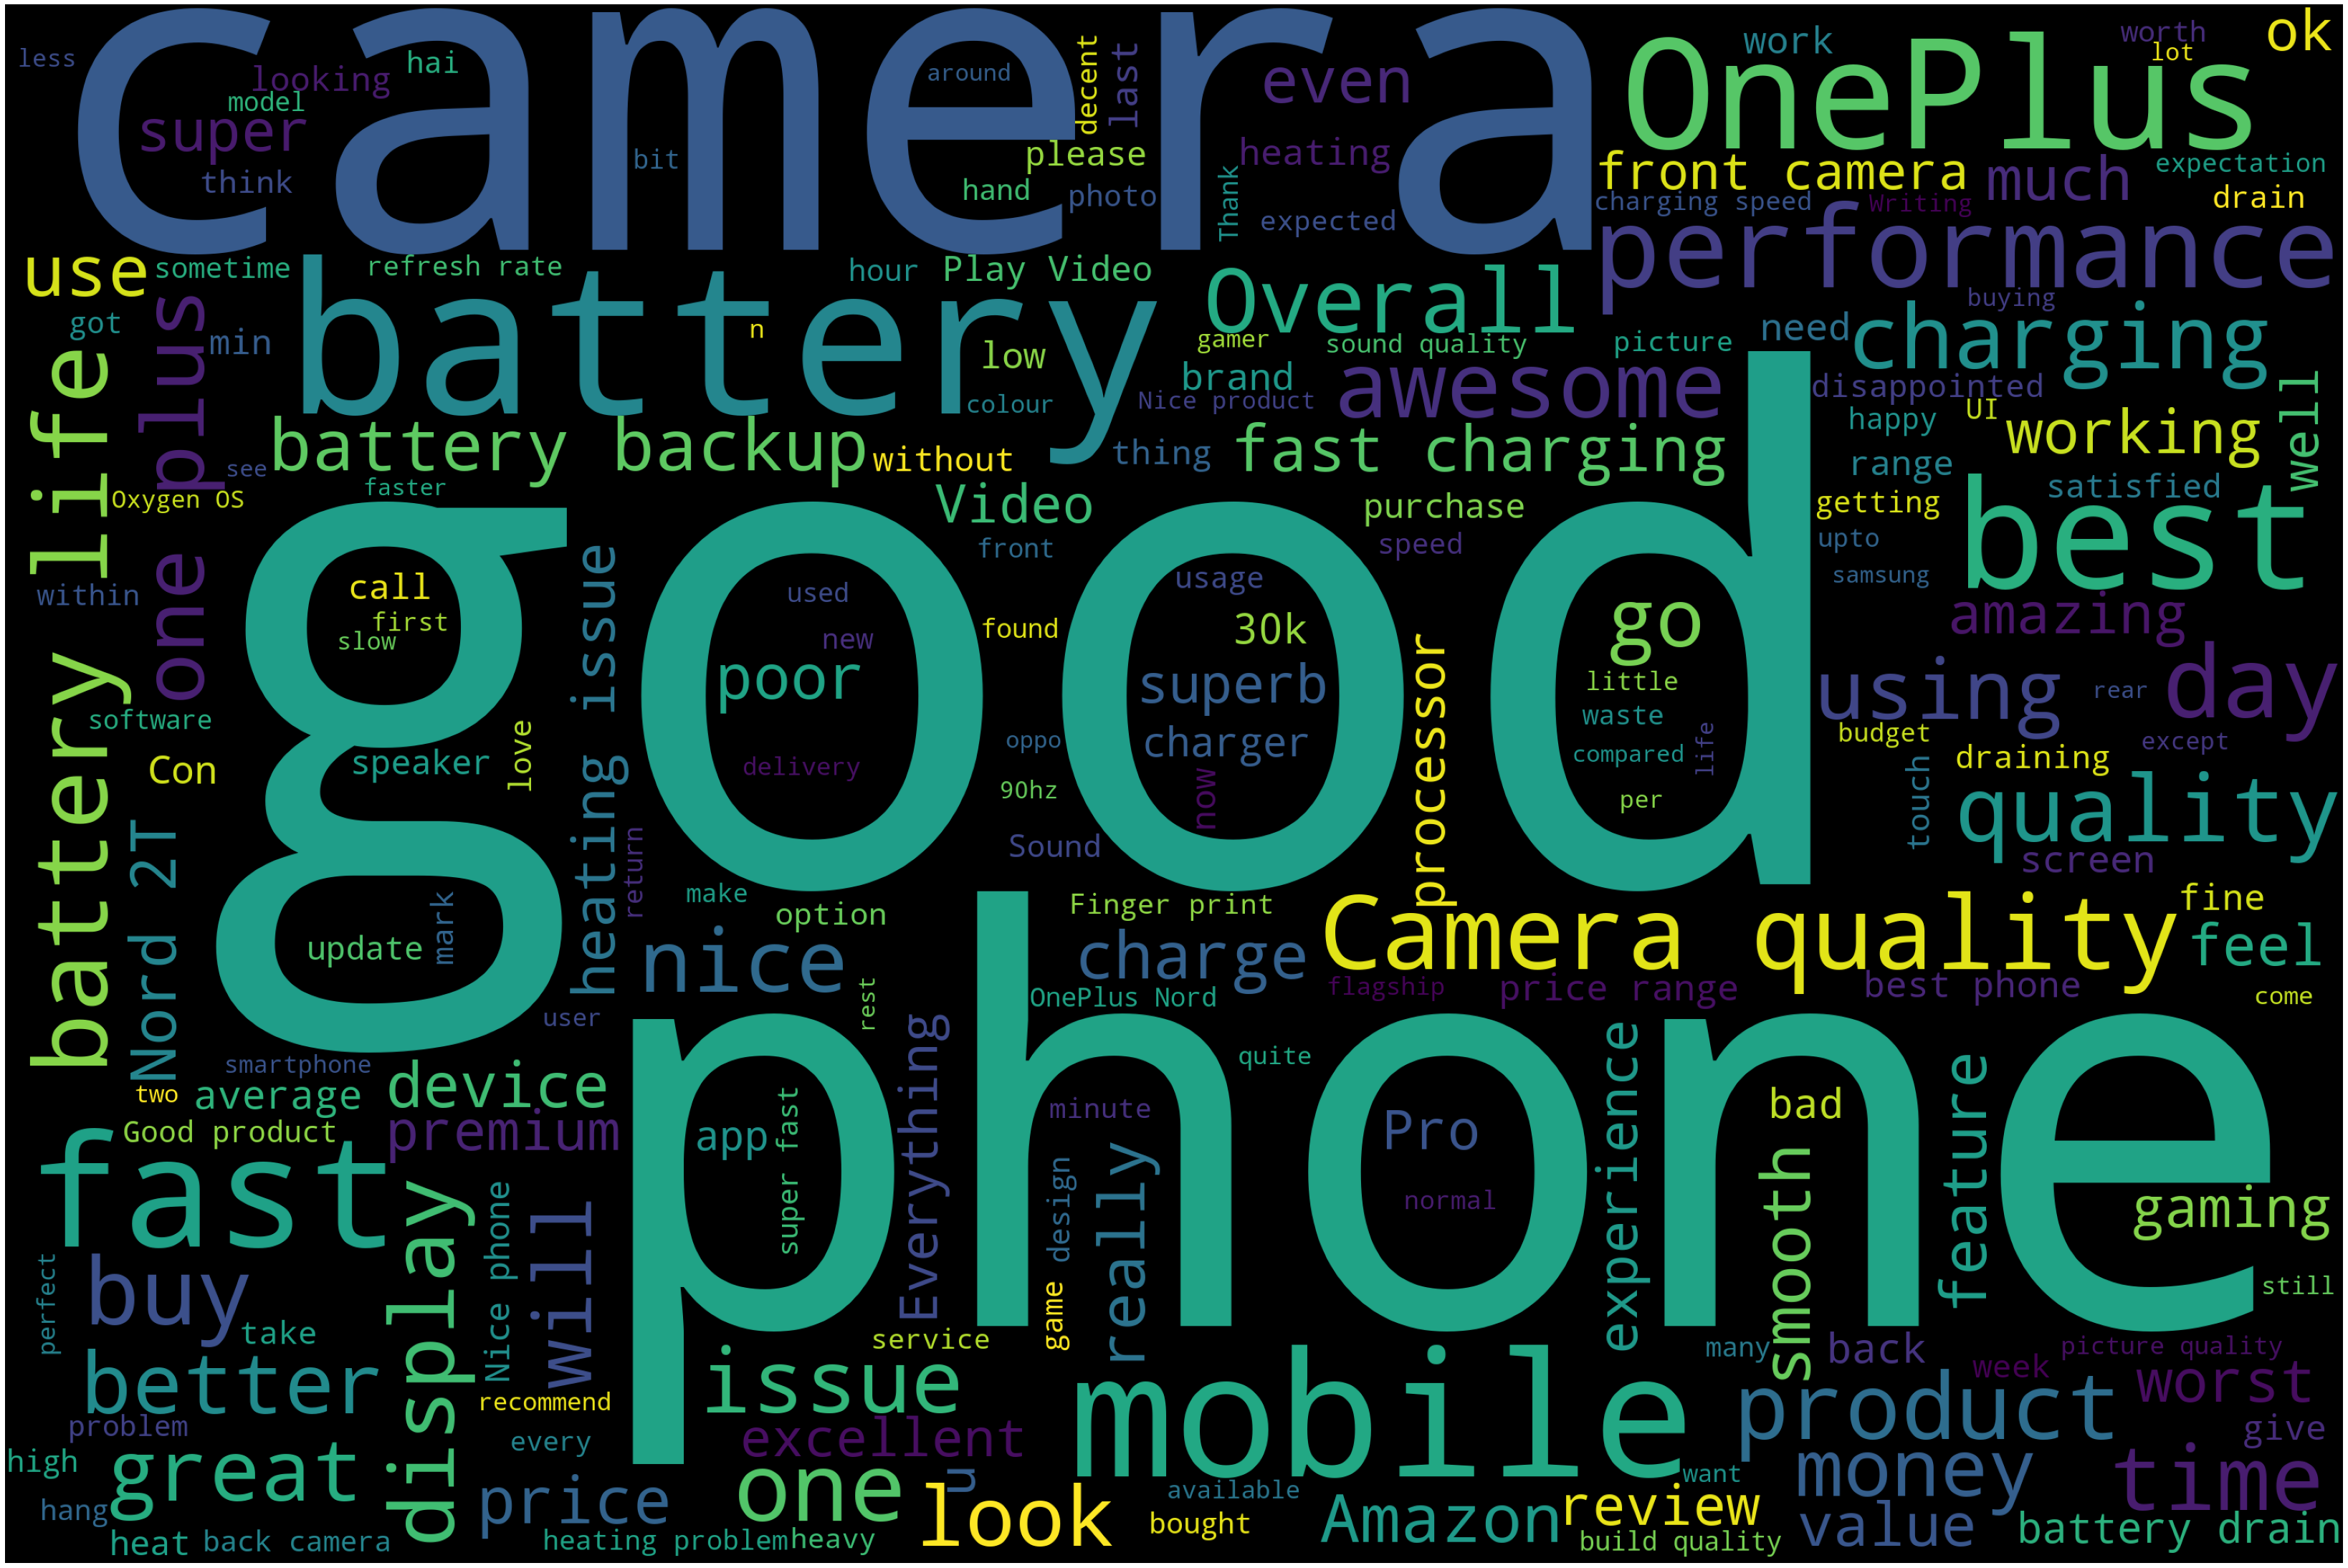

In [34]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, 
                      height = 2000,
                      background_color='black').generate(text)
# Plot
plot_cloud(wordcloud)

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/abhishekgd96/Text-Mining/main/reviews.csv', encoding = 'latin-1')
data = data['Review Content']
data = data.astype(str)
data = data[data.str.contains('nan')==False]
data

0       The camera is not up to the mark for its build...
1       Selfie camera is not up to the mark,rest is go...
2       Pros:- 1. Performance is best for normal user....
3       Writing this review after 19 days of usage\n\n...
4       I didn't felt a difference between 10k vs Nord...
                              ...                        
1275    If u are going to spend 28000 then blindly go ...
1276                               Every thing is perfect
1277    The best phone in this segment and also the br...
1278     Superb video photo gameing battery life very ...
1279    My daughter liked it. She was looking for phon...
Name: Review Content, Length: 1189, dtype: object

In [36]:
one_block = data[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [37]:
for token in doc_block[:]:
    print(token, token.pos_)

Pros:- PROPN
1 X
. PUNCT
Performance NOUN
is AUX
best ADJ
for ADP
normal ADJ
user NOUN
. PUNCT

 SPACE
2 X
. PUNCT
Camera NOUN
is AUX
excellent ADJ
as SCONJ
it PRON
has VERB
sony NOUN
sensor NOUN
. PUNCT

 SPACE
3 X
. PUNCT
Fingerprint NOUN
and CCONJ
display NOUN
is AUX
also ADV
best ADJ
as SCONJ
it PRON
has AUX
amoled VERB
display NOUN
. PUNCT

 SPACE
4 X
. PUNCT
Sound PROPN
Quality PROPN
is AUX
good ADJ


 SPACE
Cons:- ADV
the DET
only ADJ
cons NOUN
i PRON
can AUX
see VERB
that SCONJ
if SCONJ
it PRON
has VERB
5000mah NUM
battery NOUN
, PUNCT
it PRON
would AUX
have AUX
been AUX
more ADV
better ADJ
. PUNCT

 SPACE
Here ADV
i PRON
want VERB
to PART
mention VERB
that PRON
do AUX
n't PART
go VERB
for ADP
negative ADJ
review NOUN
about ADP
battery NOUN
, PUNCT
you PRON
have VERB
to PART
optimise VERB
in ADP
the DET
settings NOUN
and CCONJ
it PRON
will AUX
easily ADV
give VERB
you PRON
20 NUM
- SYM
30 NUM
hrs NOUN
of ADP
backup NOUN
in ADP
single ADJ
charge NOUN
. PUNCT


In [38]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

nouns_verbs

['Performance',
 'user',
 'Camera',
 'has',
 'sony',
 'sensor',
 'Fingerprint',
 'display',
 'amoled',
 'display',
 'cons',
 'see',
 'has',
 'battery',
 'want',
 'mention',
 'go',
 'review',
 'battery',
 'have',
 'optimise',
 'settings',
 'give',
 'hrs',
 'backup',
 'charge']

In [39]:
#Counting tokens again
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<26x23 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [40]:
X.shape

(26, 23)

In [41]:
X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [42]:
cv.get_feature_names()

['amoled',
 'backup',
 'battery',
 'camera',
 'charge',
 'cons',
 'display',
 'fingerprint',
 'give',
 'go',
 'has',
 'have',
 'hrs',
 'mention',
 'optimise',
 'performance',
 'review',
 'see',
 'sensor',
 'settings',
 'sony',
 'user',
 'want']

In [43]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

,amoled,backup,battery,camera,charge,cons,display,fingerprint,give,go,...,mention,optimise,performance,review,see,sensor,settings,sony,user,want
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1]])

In [45]:
cv.vocabulary_

{'performance': 15,
 'user': 21,
 'camera': 3,
 'has': 10,
 'sony': 20,
 'sensor': 18,
 'fingerprint': 7,
 'display': 6,
 'amoled': 0,
 'cons': 5,
 'see': 17,
 'battery': 2,
 'want': 22,
 'mention': 13,
 'go': 9,
 'review': 16,
 'have': 11,
 'optimise': 14,
 'settings': 19,
 'give': 8,
 'hrs': 12,
 'backup': 1,
 'charge': 4}

In [46]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
wf_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
0,amoled,1
1,backup,1
2,battery,2
3,camera,1
4,charge,1
5,cons,1
6,display,2
7,fingerprint,1
8,give,1
9,go,1


In [47]:
wf_df.sort_values(by = 'count',
                  ascending = False,
                  inplace = True,
                  ignore_index = True)
wf_df

,word,count
0,battery,2
1,display,2
2,has,2
3,amoled,1
4,mention,1
5,user,1
6,sony,1
7,settings,1
8,sensor,1
9,see,1


In [48]:
'''
Another Way

#cv.vocabulary_.items()

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
wf_df

#wf_df[0:10]
'''

"\nAnother Way\n\n#cv.vocabulary_.items()\n\nwords_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]\nwords_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)\nwords_freq\n\nwf_df = pd.DataFrame(words_freq)\nwf_df.columns = ['word', 'count']\nwf_df\n\n#wf_df[0:10]\n"

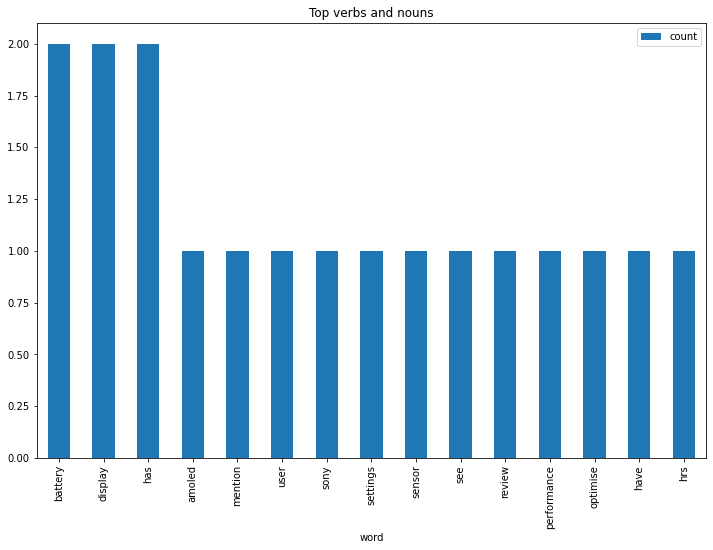

In [49]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#All words
#wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [50]:
#Sentiment analysis
afinn = pd.read_csv('https://raw.githubusercontent.com/abhishekgd96/Text-Mining/main/Afinn.csv', encoding = 'latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [51]:
sentences = tokenize.sent_tokenize(" ".join(data))

sentences[0:20]

['The camera is not up to the mark for its build.',
 'They say it has a Sony camera but the crispiness is not there once you capture it.',
 'Over all a great phone except for the camera.',
 'You can got it" Selfie camera is not up to the mark,rest is good, working softly after 1mths of use.Battery back up is of one day after normal use.Sound quality is very good,also the front camera,so good value for money.',
 'Pros:- 1.',
 'Performance is best for normal user.',
 '2.',
 'Camera is excellent as it has sony sensor.',
 '3.',
 'Fingerprint and display is also best as it has amoled display.',
 '4.',
 'Sound Quality is good\n\nCons:- the only cons i can see that if it has 5000mah battery, it would have been more better.',
 "Here i want to mention that don't go for negative review about battery, you have to optimise in the settings and it will easily give you 20-30 hrs of backup in single charge.",
 'Writing this review after 19 days of usage\n\nPro:\ndisplay is very nice and smooth\nPerfor

In [52]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,The camera is not up to the mark for its build.
1,They say it has a Sony camera but the crispine...
2,Over all a great phone except for the camera.
3,"You can got it"" Selfie camera is not up to the..."
4,Pros:- 1.
...,...
1717,Screen brightness could be more.
1718,There is no such heating problem while downloa...
1719,Most interesting part is charging speed that i...
1720,Every thing is perfect The best phone in this ...


In [53]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [54]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [55]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [56]:
sent_df

,sentence,sentiment_value
0,The camera is not up to the mark for its build.,0
1,They say it has a Sony camera but the crispine...,0
2,Over all a great phone except for the camera.,3
3,"You can got it"" Selfie camera is not up to the...",9
4,Pros:- 1.,0
...,...,...
1717,Screen brightness could be more.,1
1718,There is no such heating problem while downloa...,1
1719,Most interesting part is charging speed that i...,6
1720,Every thing is perfect The best phone in this ...,14


In [57]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

,sentence,sentiment_value,word_count
0,The camera is not up to the mark for its build.,0,11
1,They say it has a Sony camera but the crispine...,0,17
2,Over all a great phone except for the camera.,3,9
3,"You can got it"" Selfie camera is not up to the...",9,40
4,Pros:- 1.,0,2
...,...,...,...
1717,Screen brightness could be more.,1,5
1718,There is no such heating problem while downloa...,1,24
1719,Most interesting part is charging speed that i...,6,31
1720,Every thing is perfect The best phone in this ...,14,51


In [58]:
sent_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count
562,Overall Good product Nice phone Mst n good Bes...,30,76
1043,It is excellent quality\nBest starp\nLook like...,32,65
80,Mobile was awesome but the amazon not giving i...,32,149
1574,"Excellent experience, good phone to buy\nExcel...",37,84
1685,Nice product good vatatey life.overall best ph...,46,99


In [59]:
sent_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count
1603,"Hence, its a shame\n\nOther Aspects to worry -...",-10,26
1375,"Very worst response from Amazon very bad, hang...",-10,31
1386,Wrost phone ever and not value for price too b...,-9,59
1432,Battery and camera waste Camera is not good Su...,-9,37
1387,"Camera quality is not good Dislikes ,battery d...",-7,68


In [60]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1722.000000
mean        2.256098
std         4.738610
min       -10.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        46.000000
Name: sentiment_value, dtype: float64

In [61]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

,sentence,sentiment_value,word_count
12,Here i want to mention that don't go for negat...,-1,33
25,faster charging with fast battery draining Ver...,-1,22
27,"After a week use , I am writing the review, I ...",-1,39
47,No bug I noticed.,-1,4
60,Battery life is poor.,-2,4


In [62]:
sent_df[sent_df['sentiment_value']<-3]

,sentence,sentiment_value,word_count
338,HEATING - I was quite sceptical before buying ...,-4,21
436,Go for it......No regrets at all and don't loo...,-5,16
782,Battery is covered up in just 20-30 minutes it...,-4,15
1124,Another flaw i found was the heating problem t...,-4,19
1173,Seriosuly disappointed with one plus Screen ha...,-5,12
1174,The damaged row was flickering so it was hard ...,-7,23
1178,Worst the battery backup of this mobile phone ...,-4,98
1180,So my point of view Very worst mobile which I ...,-6,19
1199,battery life very bad only using 1-2hr for wha...,-4,14
1229,"Battery backup worst,overall performance slow ...",-5,11


In [63]:
sent_df[sent_df['sentiment_value']<-3].head()['sentence']

338     HEATING - I was quite sceptical before buying ...
436     Go for it......No regrets at all and don't loo...
782     Battery is covered up in just 20-30 minutes it...
1124    Another flaw i found was the heating problem t...
1173    Seriosuly disappointed with one plus Screen ha...
Name: sentence, dtype: object

In [64]:
sent_df[sent_df['sentiment_value']<-3].head()['sentence'].tolist()

['HEATING - I was quite sceptical before buying Nord 2T given the notorious performance of its predecessor in this particular department.',
 "Go for it......No regrets at all and don't look at the negative comments in the reviews.",
 'Battery is covered up in just 20-30 minutes it get fully charged so no worries.',
 'Another flaw i found was the heating problem the heating will really bother you if you are a gamer.',
 'Seriosuly disappointed with one plus Screen had a row of damaged pixels.']

In [65]:
sent_df['index'] = range(0, len(sent_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


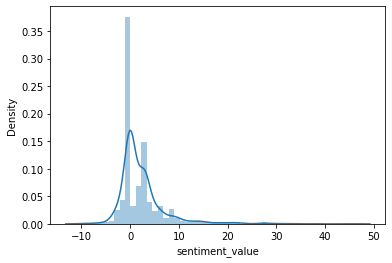

In [66]:
sns.distplot(sent_df['sentiment_value'])

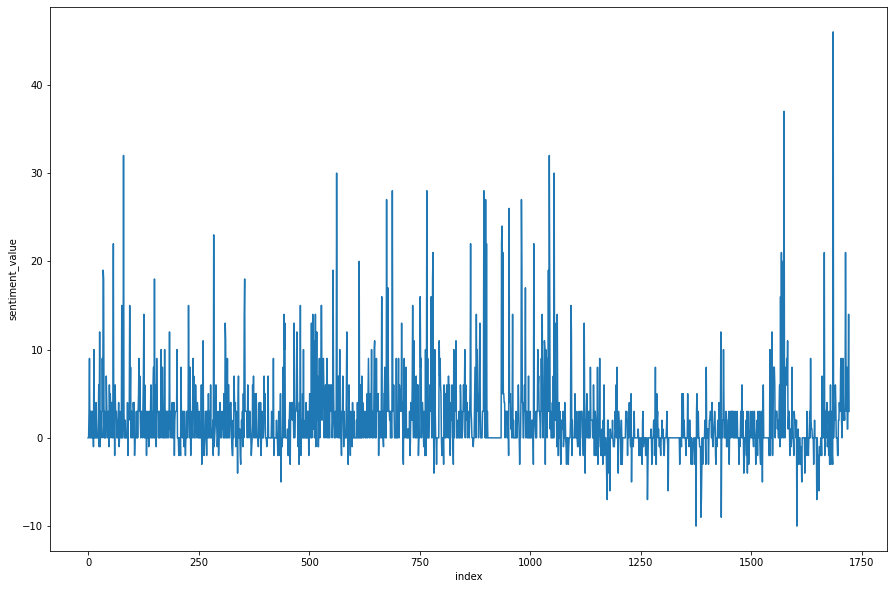

In [67]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

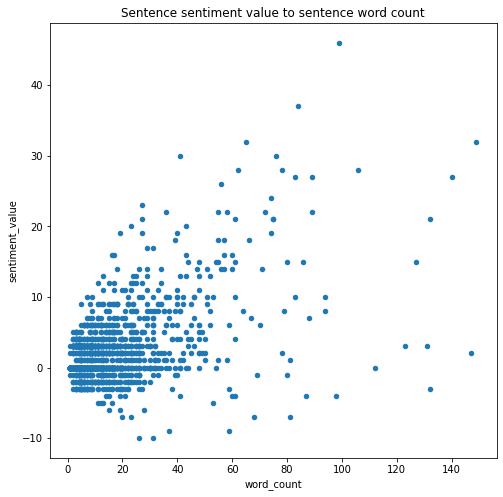

In [68]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(8,8),
                     title='Sentence sentiment value to sentence word count')